## AMAT 250: Problem Set 2

### Item 1C

Denote $t_M$ the time by which the Wiener process achieves its maximum on the interval $[0, 1]$. Using the standard Wiener process, write a code that simulates the realizations of the random variable $t_M$ and plot a histogram of its distribution. The plots for this item must look like the image below.

<img src="img3.png" width=450 height=450/>

_______

### Some notes for this simulation
- `T` - total time for each Wiener process, which is 1
- `N` - number of steps nufor each Wiener process
- `t_M` - random variable considered for the simulation (time at which the Wiener process achieved the maximum on $[0, 1]$
- `W` - simulated Wiener process

### Simulating the Wiener Process

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define the wiener process 
def wiener_process(T, N):
    W0 = [0]
    dt = T/float(N)
    # simulate the increments by normal random variable generator
    increments = np.random.normal(0, 1*np.sqrt(dt), N)
    W = W0 + list(np.cumsum(increments))
    return W

In [3]:
# assumptions for the simulation
N = 500    # number of steps
T = 1      # total time
dt = T / float(N)
t = np.linspace(0.0, N*dt, N+1)
W = wiener_process(T, N)   # resulting values for the Wiener process

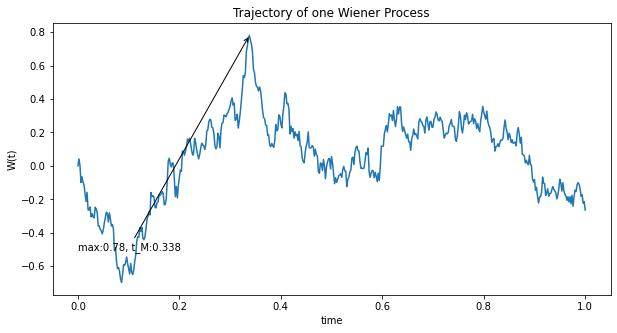

In [4]:
#trajectory of one Wiener Process
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t, W)

# x-axis label
ax.set_xlabel("time")

# y-axis label
ax.set_ylabel("W(t)")

ax.annotate("max:"+str(round(max(W),2))+', t_M:'+str(t[W.index(max(W))]),
            xy=(t[W.index(max(W))], max(W)), xycoords='data',
            xytext=(0, -0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),)

ax.set_title("Trajectory of one Wiener Process")

# display dataset
plt.show()

### Running Multiple Wiener Process 
Here, we will run the Wiener Process multiple times. <br> Then, get the maximum for each Wiener Process and collect all the time when it happened.

In [5]:
# calculating t_M, maximum of each Wiener Process
run = 500  # run the Wiener process by this number
collection_t_M = []
for i in range(run):
    W = wiener_process(T,N)
    t_M = t[W.index(max(W))]
    collection_t_M.append(t_M)

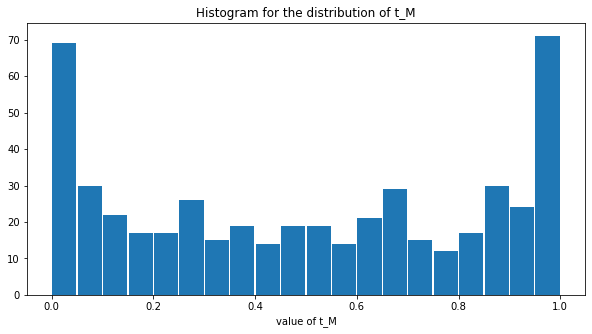

In [6]:
# Histogram for the distribution of t_M
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(collection_t_M, label="t_M", bins=20, rwidth=0.95)
ax.set_xlabel("value of t_M")
ax.set_title("Histogram for the distribution of t_M")
plt.show()